In [152]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

#function for reading the csv data
def csv_reader(name):
    with open(name)as f:
        data = np.asarray(list(csv.reader(f, delimiter=',')))
    Xval = np.asarray(data[1:,0]).astype('float')
    Yval = np.asarray(data[1:,1]).astype('float')
    
    return Xval, Yval


#plotting function
def plotter(xdata, ydata, xlabel=' ', ylabel=' ', ptitle=' ', noshow=1, legend=' '):
    fig1 = plt.plot(xdata, ydata, label=legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(ptitle)
    if legend == ' ': # ignores legend if no input
        pass
    else:
        plt.legend()

    plt.savefig(ptitle, dpi=100)
    if noshow == 0: # doesn't call show(), usefull for when you need multiple plots in the same figures
        plt.show()
    


# how lineplotting works
# plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)

# function for extracting the -3db freq
def breakpoint(xdata, ydata, crop=0, BWP=1, DCP=0):
    if crop == 1:
        Datapoint = np.where(0 <= ydata)
        xpoints = xdata[Datapoint]
        ypoints = ydata[Datapoint]
    else:
        xpoints = xdata
        ypoints = ydata

    maxV = np.amax(ypoints, axis=0)
    dbVal = 20*math.log10(maxV) #Ref point is set to 1V
    BWpoint = (10**((dbVal-3)/20))
    Xbw = np.asarray(np.where(BWpoint <= ypoints))


    intpoint = Xbw[0,-1]
    print("the -3db point is at: ", BWpoint, "V")
    print("maximum voltage is: ", maxV, "V")
    print("DC gain is:", dbVal, "db")
    print("Bandwith is: {:.2e} Hz".format(xpoints[intpoint]));
    print("GBW is: {:.2e}".format(maxV*xpoints[intpoint]))

    if BWP == 1:  
        bandwith = xpoints[intpoint]
        return BWpoint, intpoint, bandwith
    else:
        return BWpoint, intpoint
    
    


6.7608e+07 Hz
DC gain is: 26.30225944979901 dB


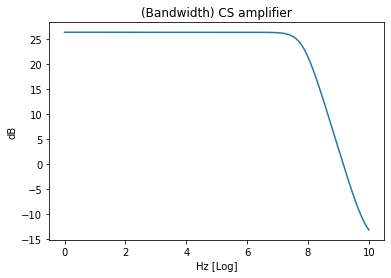

In [166]:
# Task 1 Bandwith

x_ac1, y_ac1 = csv_reader('T1_BW_PL.csv')
BWpoint = np.amax(y_ac1, axis=0)
BWy = np.asarray(np.where((BWpoint - 3) <= y_ac1))
BWHz = x_ac1[BWy[0,-1]]
print("{:.4e} Hz".format(BWHz))
print("DC gain is:", BWpoint, "dB")
plotter(np.log10(x_ac1), y_ac1, xlabel="Hz [Log]", ylabel='dB', ptitle='(Bandwidth) CS amplifier')

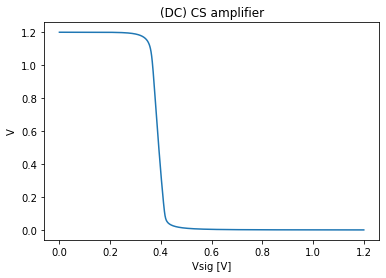

Calculated Vsig bias: 0.3864 V


In [154]:
# Task 1 operating point
x_ac1, y_ac1 = csv_reader('T1_CS_operating_point.csv')

plotter(x_ac1, y_ac1, xlabel="Vsig [V]", ylabel='V', ptitle='(DC) CS amplifier', noshow=0)

DCpoint = np.asarray(np.where(0.6 <= y_ac1))
print("Calculated Vsig bias: {:.4f} V".format(x_ac1[DCpoint[0,-1]]))

the -3db point is at:  14.654910952190274 V
maximum voltage is:  20.70061193307196 V
DC gain is: 26.319663677474914 db
Bandwith is: 4.30e+07 Hz
GBW is: 8.90e+08


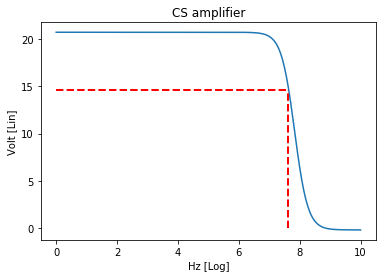

In [155]:
# Task 1
x_ac1, y_ac1 = csv_reader('T1_CS_AC_SW.csv')

plotter(np.log10(x_ac1), -y_ac1, xlabel="Hz [Log]", ylabel='Volt [Lin]', ptitle='CS amplifier')

BWpt, intpoint, cbandwith = breakpoint(x_ac1, -y_ac1, crop=0)

plt.plot([0, np.log10(x_ac1[intpoint])], [BWpt, BWpt], color='r', linestyle='--', linewidth=2)
plt.plot([np.log10(x_ac1[intpoint]), np.log10(x_ac1[intpoint])], [0, BWpt], color='r', linestyle='--', linewidth=2)
plt.show()

1.2882e+07 Hz
DC gain is: 51.77278902711033 dB


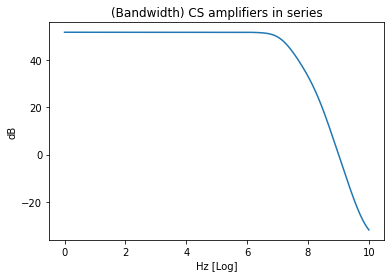

In [167]:
# Task 2 Bandwith

x_ac1, y_ac1 = csv_reader('T2_BW_PL.csv')
BWpoint = np.amax(y_ac1, axis=0)
BWy = np.asarray(np.where((BWpoint - 3) <= y_ac1))
BWHz = x_ac1[BWy[0,-1]]
print("{:.4e} Hz".format(BWHz))
print("DC gain is:", BWpoint, "dB")
plotter(np.log10(x_ac1), y_ac1, xlabel="Hz [Log]", ylabel='dB', ptitle='(Bandwidth) CS amplifiers in series')

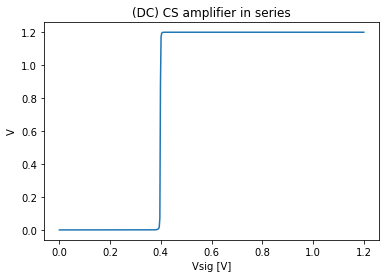

Calculated Vsig bias: 0.3984 V


In [157]:
# Task 2 operating point
x_ac1, y_ac1 = csv_reader('T2_CS_operating_point.csv')

plotter(x_ac1, y_ac1, xlabel="Vsig [V]", ylabel='V', ptitle='(DC) CS amplifier in series', noshow=0)

DCpoint = np.asarray(np.where(0.6 <= y_ac1))
print("Calculated Vsig bias: {:.4f} V".format(x_ac1[DCpoint[0,0]]))

the -3db point is at:  281.853710682784 V
maximum voltage is:  398.1289484306718 V
DC gain is: 52.00047513603874 db
Bandwith is: 7.94e+06 Hz
GBW is: 3.16e+09


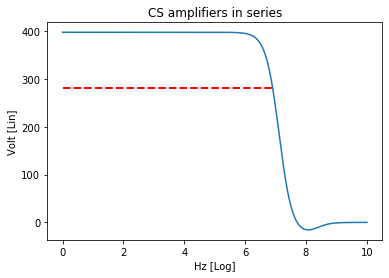

In [158]:
#Task 2

x_ac2, y_ac2 = csv_reader('T2_CS_AC_SW.csv')

plotter(np.log10(x_ac2), y_ac2, xlabel="Hz [Log]", ylabel='Volt [Lin]', ptitle='CS amplifiers in series')
# Bandwith is 13.081 MHz
BWpt, intpoint, cbandwith = breakpoint(x_ac2, y_ac2, crop=0)

plt.plot([0, np.log10(x_ac2[intpoint])], [BWpt, BWpt], color='r', linestyle='--', linewidth=2)
#plt.plot([np.log10(x_ac2[intpoint]), np.log10(x_ac2[intpoint])], [0, BWpt], color='r', linestyle='--', linewidth=2)
plt.show()



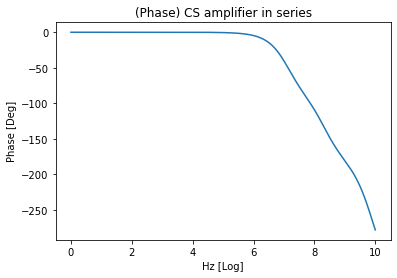

In [159]:
# task 2 Phase plot 
x_ac2, y_ac2 = csv_reader('T2_PH_AC_SW.csv')

plotter(np.log10(x_ac2), y_ac2, xlabel="Hz [Log]", ylabel='Phase [Deg]', ptitle='(Phase) CS amplifier in series')

#These values were copied from cadence, as we couldnt find a way to link them after exporting the data
#Phase angle at 0db: 782MHz -174deg, approx

3.0200e+07 Hz


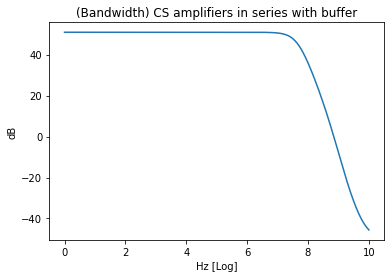

In [160]:
# Task 3 Bandwith

x_ac1, y_ac1 = csv_reader('T3_BW_PL.csv')
BWpoint = np.amax(y_ac1, axis=0)
BWy = np.asarray(np.where((BWpoint - 3) <= y_ac1))
BWHz = x_ac1[BWy[0,-1]]
print("{:.4e} Hz".format(BWHz))


plotter(np.log10(x_ac1), y_ac1, xlabel="Hz [Log]", ylabel='dB', ptitle='(Bandwidth) CS amplifiers in series with buffer')

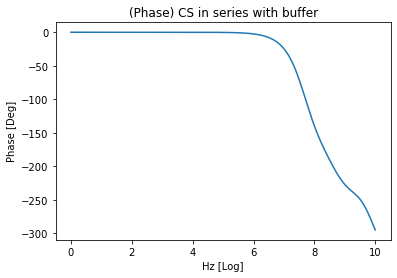

In [161]:
# task 3 Phase plot 
x_ac2, y_ac2 = csv_reader('T3_PH_AC_SW.csv')

plotter(np.log10(x_ac2), y_ac2, xlabel="Hz [Log]", ylabel='Phase [Deg]', ptitle='(Phase) CS in series with buffer')


#These values were copied from cadence, as we couldnt find a way to link them after exporting the data
#Phase angle at 0db: 120MHz -149deg, approx

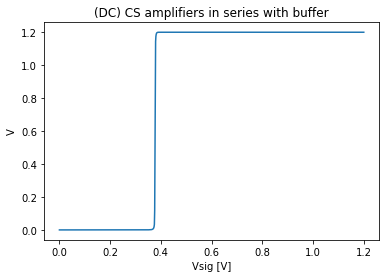

Calculated Vsig bias: 0.3780 V


In [162]:
# Task 3 operating point
x_ac1, y_ac1 = csv_reader('T3_DC_SW.csv')

plotter(x_ac1, y_ac1, xlabel="Vsig [V]", ylabel='V', ptitle='(DC) CS amplifiers in series with buffer', noshow=0)
# Bandwith is 30.7719 MHz
DCpoint = np.asarray(np.where(0.6 <= y_ac1))
print("Calculated Vsig bias: {:.4f} V".format(x_ac1[DCpoint[0,0]]))

the -3db point is at:  260.8422051892759 V
maximum voltage is:  368.4494080520445 V
DC gain is: 51.32755726250462 db
Bandwith is: 1.58e+07 Hz
GBW is: 5.84e+09


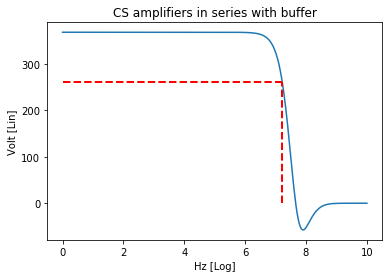

In [163]:
#Task 3 AC sweep 
x_ac2, y_ac2 = csv_reader('T3_CS_SF_AC_SW.csv')

plotter(np.log10(x_ac2), y_ac2, xlabel="Hz [Log]", ylabel='Volt [Lin]', ptitle='CS amplifiers in series with buffer')

BWpt, intpoint, cbandwith = breakpoint(x_ac2, y_ac2, crop=0)

plt.plot([0, np.log10(x_ac2[intpoint])], [BWpt, BWpt], color='r', linestyle='--', linewidth=2)
plt.plot([np.log10(x_ac2[intpoint]), np.log10(x_ac2[intpoint])], [0, BWpt], color='r', linestyle='--', linewidth=2)
plt.show()

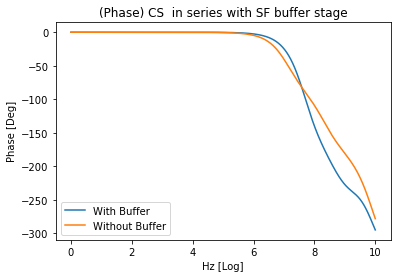

In [164]:
# Task 3 Phase plot 

x_ac2, y_ac2 = csv_reader('T3_PH_AC_SW.csv')

plotter(np.log10(x_ac2), y_ac2, xlabel="Hz [Log]", ylabel='Phase [Deg]', ptitle='(Phase) CS  in series with SF buffer stage', legend='With Buffer')

x_ac2, y_ac2 = csv_reader('T2_PH_AC_SW.csv')

plotter(np.log10(x_ac2), y_ac2, xlabel="Hz [Log]", ylabel='Phase [Deg]', ptitle='(Phase) CS  in series with SF buffer stage', legend='Without Buffer')

plt.show()